In [0]:
# EnvGlobel
# Authors: Yhary Arias, Jean Pico, Jesús Angel, Andrés Quintero, Juan Peñaranda, Freyman Balaguera

In [0]:
import pandas as pd
#import numpy as np
import copy
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dfStations = pd.read_csv('/content/drive/My Drive/EnvGlobel/dataset_stations_pollution.csv', sep = ';')
dfStations.head()

,Station,Date,Time,O3(ppm),TEMP(Deg F),RH(%),BP(in HG)
0,Dunkirk,5/30/2017,12:00 a. m.,0.039,58.9,80.0,29.26
1,Dunkirk,5/30/2017,1:00 a. m.,0.044,55.7,88.0,29.28
2,Dunkirk,5/30/2017,2:00 a. m.,0.044,54.7,93.0,29.27
3,Dunkirk,5/30/2017,3:00 a. m.,0.037,55.1,94.0,29.27
4,Dunkirk,5/30/2017,4:00 a. m.,0.032,55.5,93.0,29.28


In [5]:
print(dfStations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70088 entries, 0 to 70087
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      70088 non-null  object 
 1   Date         70088 non-null  object 
 2   Time         70088 non-null  object 
 3   O3(ppm)      66566 non-null  float64
 4   TEMP(Deg F)  51759 non-null  float64
 5   RH(%)        59191 non-null  float64
 6   BP(in HG)    53615 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.7+ MB
None


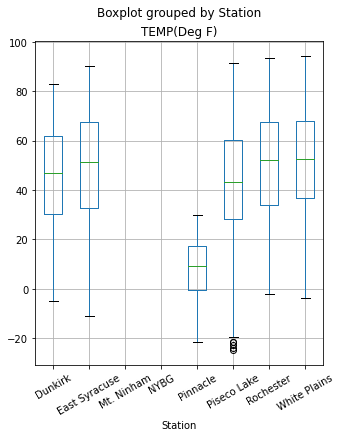

In [6]:
# BOXPLOT (relationship between a categorical feature and a continuous feature).

dfStations.boxplot('TEMP(Deg F)', 'Station', rot = 30, figsize = (5, 6))

In [0]:
dfCopy = dfStations.copy()

In [0]:
dfCopy['Date'] = pd.to_datetime(dfCopy['Date'],format='%m/%d/%Y')

In [9]:
dfCopy.head()

,Station,Date,Time,O3(ppm),TEMP(Deg F),RH(%),BP(in HG)
0,Dunkirk,2017-05-30,12:00 a. m.,0.039,58.9,80.0,29.26
1,Dunkirk,2017-05-30,1:00 a. m.,0.044,55.7,88.0,29.28
2,Dunkirk,2017-05-30,2:00 a. m.,0.044,54.7,93.0,29.27
3,Dunkirk,2017-05-30,3:00 a. m.,0.037,55.1,94.0,29.27
4,Dunkirk,2017-05-30,4:00 a. m.,0.032,55.5,93.0,29.28


In [0]:
dfCopy['Time'] = dfCopy['Time'].astype(str).str.upper().str.replace('.','')

In [11]:
dfCopy.head()

,Station,Date,Time,O3(ppm),TEMP(Deg F),RH(%),BP(in HG)
0,Dunkirk,2017-05-30,12:00 A M,0.039,58.9,80.0,29.26
1,Dunkirk,2017-05-30,1:00 A M,0.044,55.7,88.0,29.28
2,Dunkirk,2017-05-30,2:00 A M,0.044,54.7,93.0,29.27
3,Dunkirk,2017-05-30,3:00 A M,0.037,55.1,94.0,29.27
4,Dunkirk,2017-05-30,4:00 A M,0.032,55.5,93.0,29.28


In [12]:
dfCopy['Time'] = pd.to_datetime(dfCopy['Time']).dt.strftime('%H:%M:%S')

/usr/local/lib/python3.6/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [13]:
dfCopy.head()

,Station,Date,Time,O3(ppm),TEMP(Deg F),RH(%),BP(in HG)
0,Dunkirk,2017-05-30,00:00:00,0.039,58.9,80.0,29.26
1,Dunkirk,2017-05-30,01:00:00,0.044,55.7,88.0,29.28
2,Dunkirk,2017-05-30,02:00:00,0.044,54.7,93.0,29.27
3,Dunkirk,2017-05-30,03:00:00,0.037,55.1,94.0,29.27
4,Dunkirk,2017-05-30,04:00:00,0.032,55.5,93.0,29.28


In [0]:
dfCopy['Datetime'] = pd.to_datetime(dfCopy['Date'].astype(str) + ' ' + dfCopy['Time'].astype(str))

In [15]:
dfCopy.head()

,Station,Date,Time,O3(ppm),TEMP(Deg F),RH(%),BP(in HG),Datetime
0,Dunkirk,2017-05-30,00:00:00,0.039,58.9,80.0,29.26,2017-05-30 00:00:00
1,Dunkirk,2017-05-30,01:00:00,0.044,55.7,88.0,29.28,2017-05-30 01:00:00
2,Dunkirk,2017-05-30,02:00:00,0.044,54.7,93.0,29.27,2017-05-30 02:00:00
3,Dunkirk,2017-05-30,03:00:00,0.037,55.1,94.0,29.27,2017-05-30 03:00:00
4,Dunkirk,2017-05-30,04:00:00,0.032,55.5,93.0,29.28,2017-05-30 04:00:00


In [0]:
dfCopy.to_csv('/content/drive/My Drive/EnvGlobel/dataset_stations_pollution_formated.csv')